# INF200 Lecture No Ju02
### Hans Ekkehard Plesser / NMBU
### 31 May 2022

## Today's topics

- Structuring your code
    - Modules and Packages
    - Relative imports
    - Recommendations for BioSim
- Python
    - Class, static, and private methods
    - Assignment expressions
    - When not to use NumPy
    - Making random decisions
    - Repetition: Mutables as default arguments
- Model dynamics in the lowland

----------------

## Modules and packages


- We could put all our code in a single file, but this is far from optimal
    - Large files are difficult to work with
    - We can only keep 5–7 things on our mind, hierarchical structure makes it easier to keep an overview
    - We may want to re-use different code in different places
    
Python's solution: *Modules* and *Packages*

* **Module:** A single Python file
* **Package:** A collection of python files (can think of it like a folder)

[Python Tutorial, ch 6](https://docs.python.org/3.9/tutorial/modules.html)

### Modules

Each Python file is a module

What is the difference between a python *module* and a python *script*?
* Technically: No difference
* In practical usage:
    * Script: Python code to be run, not imported
    * Module: Python code to be imported, not run

#### Example Python module

We will create a Python module live through Jupyter notebook, using [cell magic](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions). Before that, we remove files and directories that will be written by this notebook so we start with a clean slate.

In [1]:
%rm *.py *.pyc

zsh:1: no matches found: *.pyc


In [2]:
%%writefile mystats.py

"""mystats provides some statistical functions."""

import math

def _square(data):
    return [x**2 for x in data]

def mean(data):
    """Returns arithmetic mean of sample data."""
    return sum(data) / float(len(data))

def var(data):
    """Returns variance of data."""
    return mean(_square(data)) - mean(data)**2

example_data = [1, 3, 2, 4, 5, 8, 1]

Overwriting mystats.py


Now that there is a file called `mystats.py`, we can import the module

In [3]:
import mystats
print(mystats.mean([1, 2, 3]))
print(mystats.var([1.5, 3, 4.5]))
print(mystats.example_data)

2.0
1.5
[1, 3, 2, 4, 5, 8, 1]


* Importing a module doesn't bind any names other than the module name itself
* We can also import individual elements of a module

In [4]:
from mystats import mean
mean([1, 2, 3])

2.0

* Or we can import all functions from a module
* Sometimes for interactive work, **not recommended in scripts and modules**

In [5]:
from mystats import *
print(example_data)
print(mean(example_data))

[1, 3, 2, 4, 5, 8, 1]
3.4285714285714284


* Names beginning with _ are not imported

In [6]:
print(_square(9))

NameError: name '_square' is not defined

- The `dir` command lets us look at all names defined in the module

In [7]:
dir(mystats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_square',
 'example_data',
 'math',
 'mean',
 'var']

Note that the module contains variables we have not set, such as `__doc__` and `__name__`

In [8]:
mystats.__doc__

'mystats provides some statistical functions.'

In [9]:
mystats.__name__

'mystats'

In [10]:
mystats.__file__

'/Users/plesser/Courses/INF200/H2021/inf200-course-materials/june_block/lectures/mystats.py'

In [11]:
import numpy
numpy.__file__

'/Users/plesser/opt/miniconda3/envs/inf200/lib/python3.9/site-packages/numpy/__init__.py'

These variables contain *meta-information*, such as the modules docstring

The `__name__`-variable is a bit special:
- If a module is imported, it is set to the name of the file (without the `.py` extension)
- If a modul is executed directly, it is set to `'__main__'`

This is why we include a `if __name__ == '__main__':` at the bottom of our scripts, it is only true if the script is executed, not if it is imported

#### Example Python script

- A script typically does some work and is not intended for import
- An alternative to writing a script could be to create a jupyter notebook instead

We now create a python script using cell magic

In [12]:
%%writefile run_stats.py

from mystats import mean, var
import random
import math

for sample_size in [10, 100, 1000, 10000]:
    sample = [random.random() for _ in range(sample_size)]
    print('{:6}{:10.5f} ± {:.5f}'.format(sample_size, mean(sample), 
                                         math.sqrt(var(sample)/(len(sample)-1))))

Overwriting run_stats.py


In [13]:
%run run_stats.py

    10   0.56036 ± 0.10767
   100   0.50135 ± 0.02871
  1000   0.50453 ± 0.00911
 10000   0.50182 ± 0.00288


- Note that we must import `math` explicitly, it is not "inherited" from `mystats`
- The `%run` magic executes the script
- Note that we can easily import from our `mystats` module, because the script and the module are stored in the same directiory

## Running vs importing

- A program can be executed in many ways:
    - Execute `python run_stats.py` on a command line/terminal
    - Run it through PyCharm
    - Run it from the notebook using `%run`
- When a program is executed in any of these ways, `__name__` is set to `'__main__'`
- All code in the script is executed sequentially

We import a package by using the `import` keyword
- In a python module or script
- In a pyhton shell
- In a notebook

When we import a module, all the code is executed sequentially, but only the first time we import it.

We can 'hide' code we do not want to be executed inside an `if __name__ == '__main__'` test

In [14]:
%%writefile my_verbose_module.py

print("This is a verbose module")

def foo():
    print("It prints lots of things")
    
if __name__ == '__main__':
    foo()

Overwriting my_verbose_module.py


In [15]:
import my_verbose_module
my_verbose_module.foo()

This is a verbose module
It prints lots of things


In [16]:
import my_verbose_module
import my_verbose_module
import my_verbose_module

The code in the module is only executed the first time the module is imported. The code in the "main" block is not executed when we import the module, so we call `foo` manually instead

If we run the code instead, the whole code is executed, including the main check

In [17]:
%run my_verbose_module

This is a verbose module
It prints lots of things


In [18]:
%run my_verbose_module

This is a verbose module
It prints lots of things


### Where can we import from?

If we try to import a module named `spam`, Python will have to search to find a module with the correct name

It searches in the same way as it does for variables, it first looks locally, and then extends outwards
* built-ins
* the directory containing the input script (or the current directory)
* PYTHONPATH (a list of directory names, with the same syntax as the shell variable PATH)
* the installation-dependent default


The fact that Python looks locally first is important, because this means you should *not* create files with the same names as modules you are going to import, because it can lead to headaches

You can see where Python looks for modules by looking at `sys.path`

In [19]:
import sys
sys.path

['/Users/plesser/Courses/INF200/H2021/inf200-course-materials/june_block/lectures',
 '/Users/plesser/opt/miniconda3/envs/inf200/lib/python39.zip',
 '/Users/plesser/opt/miniconda3/envs/inf200/lib/python3.9',
 '/Users/plesser/opt/miniconda3/envs/inf200/lib/python3.9/lib-dynload',
 '',
 '/Users/plesser/opt/miniconda3/envs/inf200/lib/python3.9/site-packages']

Importing from your own module is automatic as long as they are in the same directory, but what happens if you want to import from a different directory?

#### How to configure the Python path
- While developing in PyCharm and running from PyCharm, PyCharm will set up correct paths for us (requires marking `src` as Sources).
- Conda or other environment managers set up proper paths for us.
- Generally, install to default locations so you do not need to manipulate the search path
    - If you "just want to try" things, create a new Conda environment and install in default location within that environment
    - Delete the environment when you are done
- If you really want to load packages from non-standard locations
    - Change PYTHONPATH
        - Linux/macOS shell: `export PYTHONPATH=/path/to/my/module_dir:$PYTHONPATH`
        - Windows: still searching ...
    - Change `sys.path` inside Python
    
        ```python
        import sys
        sys.path.insert(0, '/path/to/my/module_dir')
        ```

## Packages

- A package is a collection of Python modules
- They exist to create structuring and sharing larger projects easier

### Example - Sound Effects

This example is taken from the [Python documentation](https://docs.python.org/3.8/tutorial/modules.html)

Let's say you want to create code that takes sound files or data and applies various sound effects too them. To make the project more structured you choose to add a new module for each type of sound effect you want to add

You project structure can then look like this
- `/effects/`
    - `__init__.py`
    - `echo.py`
    - `surround.py`
    - `reverse.py`
    - `autotune.py`
    - ....



To create the project we simply gather all the different modules (`echo.py`, `surround.py`, and so on) in a single directory, and then we create a `__init__.py` file

The `__init__.py` file specifies to Python that the `effects` directory should be interpreted as a *package*. The file itself can be empty

We can then use the package as follows
```python
import effects
effects.echo.add_echo(sound)

import effects.echo
effects.echo.add_echo

from effects.echo import add_echo
add_echo(sound)
```

These packages are sometimes referred to as 'multi-file modules'. You have probably used them without thinking about it:
- matplotlib.pyplot
- numpy.random

They are also referred to as 'import packages', as they are primarily used to define how importing the various modules should be done

### Sub-packages

Packages can be defined in a nested hierarchy. Let us say we extend our 'sound effects' project to also include other handling of sound files, such are changing formats or adding filters

After some work our project might look like this

- `sound/`
    - `__init__.py`
    - `formats/`
        - `__init__.py`
        - `wavread.py`
        - `wavwrite.py`
        - `aiffread.py`
        - `aiffwrite.py`
        - `auread.py`
        - `auwrite.py`
        - `...`
    - `effects/`
        - `__init__.py`
        - `echo.py`
        - `surround.py`
        - `reverse.py`
        - `...`
    - `filters/`
        - `__init__.py`
        - `equalizer.py`
        - `vocoder.py`
        - `karaoke.py`

Here, `sound` is a package (because it is a folder with a `__init__.py` file), that contains three sub-packages: 
- `formats`
- `effects`
- `filters`

Each of the subpackages contain their own `__init__.py` file to signify that they are to be treated as packages as well.

## Relative imports

- Modules within a package often depend on each other
    - must import each other
    - must avoid importing modules of same name elsewhere in `sys.path`

- Solution: relative imports
    - always in the form
    
      ```Python
      from <module or package> import <something>
      ``` 
    - always start with a dot `.` (or several dots)
    - see [Tutorial, ch 6.4.2](https://docs.python.org/3.8/tutorial/modules.html#intra-package-references) and [PEP 328](http://legacy.python.org/dev/peps/pep-0328/)

#### Relative import properties
- The `.` marks import as *relative* 
- Python looks for modules only within the package
- does not look in directories in `sys.path`
- avoids confusion with modules/packages of same name elsewhere
- **work only inside packages** (i.e., directories with `__init__.py` in them)

#### Modules with using relative imports cannot be run
- Modules that are part of packages and therefore use relative imports cannot be executed directly (as scripts)
- You cannot "Run" them in PyCharm
- This is intentional: packages are to be imported
- To use the code from such modules, create a script that imports the module
    - create the script outside the package, e.g., in the `checks` or `examples` directory
- See `june_block/examples/chutes_project/examples/chutes_demo`

## Recommendations for BioSim

- Inside `src/biosim` provide only "pure" **modules**
- "Pure" module: A module that is only used by `import`, never run directly
    - Do **not** include any code to be executed directly, e.g., to run a mini-simulation or test
    - Do **not** include a `__name__ == "__main__"` section
- Create a directory `scripts` at the top level (parallel to `src`, `tests`,  `reference_examples`)
    - Place all scripts you want to run during development here
    - These scripts should then use `import biosim` or `from biosim import abc` or `import biosim.xyz`, ...
    - Everything you want to run goes here (or in `tests`)
    - `scripts`: scripts you use during development to test and explore
- Tests in `tests` also import using `import biosim` or `from biosim import abc` or `import biosim.xyz`, ...
- Within the `biosim` package, i.e., in all modules defined in `src/biosim`, use only relative imports to import other biosim modules.
- Later, create a directory `examples` with nice examples to show what one can do with BioSim

-------------

# Python techniques

## Class methods

- Methods usually work on individual objects
- Sometimes, it can be useful to do things at a class level
- Examples
    - count number of instances of a class
    - set parameters that apply to all members of a class
- We can achieve this by writing *class methods*
- A method becomes a class method by adding the `@classmethod` *decorator*
- The `self` argument is replaced by `cls` in class methods

In [20]:
class Truck:
    
    instance_count = 0       # number of trucks
    weight_empty = 1000      # weight of empty truck
    
    @classmethod
    def count_new_truck(cls):
        cls.instance_count += 1
        
    @classmethod
    def num_trucks(cls):
        return cls.instance_count
    
    @classmethod
    def set_weight_empty(cls, we):
        cls.weight_empty = we
        
    def __init__(self, load):
        self._load = load
        self.count_new_truck()
        
    def total_weight(self):
        return self._load + self.weight_empty
    
Truck.set_weight_empty(1500)
trucks = [Truck(load) for load in [100, 500, 1000]]
print("Number of trucks:", Truck.num_trucks())

for truck in trucks:
    print("Total weight:", truck.total_weight())

Number of trucks: 3
Total weight: 1600
Total weight: 2000
Total weight: 2500


Note the following:

- We can access class attributes through `self`
- When counting new trucks, we must make sure that we update the class attribute `instance_count`,  not create an `instance_count` attribute in the instance created. Therefore, we use the *class* method `count_new_truck()`.
- When calling `self.count_new_truck()`, Python automatically makes sure that the class of `self`,  not `self` is passed as parameter `cls`.

### Class methods and inheritance

- The `cls` argument passed to a class method is always the concrete class of the object on which the class method is called

In [21]:
class A:
    _info = None
    
    @classmethod
    def print_info(cls):
        print("Class info:", cls._info)
        
    def display(self):
        print("Displaying ...", end=' ')
        self.print_info()
        
class B(A):
    _info = "This is class B"
    
class C(A):
    _info = "This is class C"
    
class D(C):
    _info = "This is class D"
    
b, c, d = B(), C(), D()

##### Call `print_info()` on instances

In [22]:
b.print_info()
c.print_info()
d.print_info()

Class info: This is class B
Class info: This is class C
Class info: This is class D


##### Call `display()` on instances, which then calls `print_info()`

In [23]:
b.display()
c.display()
d.display()

Displaying ... Class info: This is class B
Displaying ... Class info: This is class C
Displaying ... Class info: This is class D


- `cls._info` always resolves to the `_info` class attribute defined in the concrete class to which the instance belongs.

Class methods can be used directly on a class

In [24]:
B.print_info()

Class info: This is class B


... while normal methods cannot be used on a class, only on instances.

In [25]:
B.display()

TypeError: display() missing 1 required positional argument: 'self'

### Static methods

- Sometimes, it can be useful to have a function in a class that behaves as a normal function, i.e., does not need any access to "self". 
- In some cases, one will define such a function outside the class.
- In other cases, it can be useful to define the function inside the class to show where it belongs logically.
- Static methods are used for this purpose. They are defined using the `@staticmethod` decorator.
- Note that they only get passed the arguments explicitly given in the call, no `self` is inserted anywhere.

In [26]:
import random

class Game:
    
    def __init__(self, seed):
        random.seed(seed)
        self.results = []
        
    def play(self):
        n1 = random.random()
        n2 = random.random()
        n3 = random.random()
        res = self._median(n1, n2, n3)
        self.results.append(res)
        
    @staticmethod
    def _median(a, b, c):
        return sorted([a, b, c])[1]
    
g = Game(12345)
for _ in range(3):
    g.play()
    
g.results

[0.41661987254534116, 0.2986398551995928, 0.1616878239293682]

In [27]:
class Game2:
    
    def __init__(self, seed):
        random.seed(seed)
        self.results = []
        
    def play(self):
        n1 = random.random()
        n2 = random.random()
        n3 = random.random()
        res = self._median(n1, n2, n3)
        self.results.append(res)
        
    def _median(self, a, b, c):
        return sorted([a, b, c])[1]
    
g = Game2(12345)
for _ in range(3):
    g.play()
    
g.results

[0.41661987254534116, 0.2986398551995928, 0.1616878239293682]

In [28]:
def _median(a, b, c):
    return sorted([a, b, c])[1]

class Game3:
    
    def __init__(self, seed):
        random.seed(seed)
        self.results = []
        
    def play(self):
        n1 = random.random()
        n2 = random.random()
        n3 = random.random()
        res = _median(n1, n2, n3)
        self.results.append(res)
            
g = Game3(12345)
for _ in range(3):
    g.play()
    
g.results

[0.41661987254534116, 0.2986398551995928, 0.1616878239293682]

### Private methods

- Sometimes, it is useful to define "helper" methods that should be used only by other methods of the same class
- To mark these methods as private, start the method name with `_`, e.g. `_helper(self, ...)`
- Private methods are an *implementation detail*
    - By making a method private, we tell other programmers using our module or class that they should not call this method.
    - This leaves us free to change the method later.
- We can do the same for data attributes. 

## Assignment expressions

- New in Python 3.8
- Assignment statement
    ```python
    x = 5
    ````
    - `x` becomes name for value `5`
    - Is a full statement in itself
- Assignment expression
    ```python
    x := 5
    ```
    - `x` becomes name for value `5`
    - Is an *expression* (like `x+5`) 
    - Has value `5`
- Also known as "walrus operator"

### Example

Tabulate $\sin(x)$, positive values only

#### Without assignment expression

In [29]:
from math import sin

In [30]:
%timeit ps = [sin(x) for x in range(100) if sin(x) > 0]

12.4 µs ± 49.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### With assignment expression

In [31]:
%timeit ps = [sx for x in range(100) if (sx := sin(x)) > 0]

10.7 µs ± 37.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


For more examples and applications, see
- https://www.digitalocean.com/community/tutorials/how-to-use-assignment-expressions-in-python
- https://www.python.org/dev/peps/pep-0572/



## When not to use NumPy

- NumPy is fast when working on large amounts of data at the same time (see L07)
- When working on scalars (single numbers), NumPy is usually *noticably* slower than "plain" Python
- Therefore, use the standard `math` or `random` modules when working with individual numbers

In [32]:
import numpy as np
import math
import random

##### Timing the exponential function

In [33]:
%timeit math.exp(0.5)

70.6 ns ± 0.269 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [34]:
%timeit np.exp(0.5)

630 ns ± 7.78 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


##### Timing a single random number

In [35]:
%timeit random.random()

59.7 ns ± 0.238 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [36]:
%timeit np.random.random()

368 ns ± 8.29 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Making random decisions

### Random number generator and seeding

- Use the `random` module to generate random numbers in the BioSim project
- This provides a global random number generator that will be used in all modules importing `random`
- At the beginning of a simulation, before drawing the first random number, call `random.seed()` to set the starting point of the generator
- If seeded correctly, running a simulation multiple times with the *same seed*, shall give *exactly the same results*. 
- If running several times with the same seed and you get different results, something *is wrong*: either you mix generators or you draw numbers before seeding.
- If running with different seeds, you should get different results.

### Events with given probability

- A certain event is to happen with probability $p$, where $0\leq p \leq 1$.
- How can we, in a computer program, decide whether the event happens in a particular simulation or not?
- Idea:
    1. Draw a random number $r$ uniformly distributed on $[0, 1)$ (note: left-closed, right-open interval)
    1. If $r < p$, the event happens.
- Questions:
    1. Why is this algorithm correct? Hint: draw the number line, mark $0, p, 1$, and "shoot".
    1. Why is the condition $r<p$ and not $r\leq p$?
    1. How can we extend this scheme to choose between more than two alternatives?

## Mutables as default arguments

- Mutables should **never** be used as default arguments
- Reason: The default value is a mutable object created when the function or method is defined. Therefore, all calls of the method will receive **the same mutable object** as argument
- [Example on Python Tutor](http://pythontutor.com/visualize.html#code=class%20A%3A%0A%20%20%20%20def%20__init__%28self,%20data%3D%5B%5D%29%3A%0A%20%20%20%20%20%20%20%20self.data%20%3D%20data%0A%20%20%20%20def%20add%28self,%20new_data%29%3A%0A%20%20%20%20%20%20%20%20self.data.extend%28new_data%29%0A%0Aa%20%3D%20A%28%5B1,%202,%203%5D%29%0Aa.add%28%5B'a',%20'b'%5D%29%0A%20%20%20%20%20%20%20%20%0Ab%20%3D%20A%28%29%0Ab.add%28%5B'c',%20'd'%5D%29%0A%0Ac%20%3D%20A%28%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) (see what happens when `c` is created!)

- Solution: Use `None` as default value and create new mutable in function if necessary

In [37]:
class A:
    def __init__(self, data=None):
        self.data = data if data is not None else []
        
    def add(self, new_data):
        self.data.extend(new_data)
        
a = A([1, 2, 3])
a.add(['a', 'b'])

b = A()
b.add(['c', 'd'])

c = A()

a.data, b.data, c.data

([1, 2, 3, 'a', 'b'], ['c', 'd'], [])

-------------------

# Model dynamics in the lowland

To provide you with a reference for expected model dynamics, I have run 

- 50 different simulations with only herbivores in a single Lowland location
- 100 different simulations with only herbivores in a single Lowland location

All simulations use default parameters.

- All animals have identical initial parameters.
- Simulation scripts are slightly modified from `mono_ho.py` and `mono_hc.py`

### Simulation script (herbivores and carnivores)

This script uses an additional feature in `BioSim` (not required in the project description) allowing the user to specify a `log_file`. For each year, the number of herbivores and carnivores on the island is written to the file.

The loop in the script is over different simulations, with a different random generator seed for each simulation. Output file names include the seed value.

```python
import textwrap
from biosim.simulation import BioSim

geogr = """\
           WWW
           WLW
           WWW"""
geogr = textwrap.dedent(geogr)

ini_herbs = [{'loc': (2, 2),
              'pop': [{'species': 'Herbivore',
                       'age': 5,
                       'weight': 20}
                      for _ in range(50)]}]
ini_carns = [{'loc': (2, 2),
              'pop': [{'species': 'Carnivore',
                       'age': 5,
                       'weight': 20}
                      for _ in range(20)]}]

for seed in range(100, 200):
    sim = BioSim(geogr, ini_herbs, seed=seed, vis_years=0,
                 log_file=f'data/mono_hc_{seed:05d}.csv')
    sim.simulate(50)
    sim.add_population(ini_carns)
    sim.simulate(251)
```

### Sample log file

```
# Year, Herbivore Count, Carnivore Count
0, 50, 0
1, 48, 0
2, 90, 0
...
298, 83, 45
299, 97, 43
300, 89, 46
```

### Analysing data

In [38]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

In [39]:
data = []
for logfile in Path('../../../inf200-internal/biosim_jan_2022/examples/data').glob('mono_ho_*.csv'):
    d = pd.read_csv(logfile, skiprows=1, usecols=[0, 1], index_col=0,
                    names=['Year', 'Herbivores'])
    d['Seed'] = int(re.match(r'.*_(\d+)\.csv', str(logfile)).group(1))
    data.append(d)
hd = pd.concat(data).pivot(columns='Seed')
hd.head()

Herbivores                                                          \
Seed        100    101    102    103    104    105    106    107    108   
Year                                                                      
0          50.0   50.0   50.0   50.0   50.0   50.0   50.0   50.0   50.0   
1          48.0   46.0   49.0   49.0   47.0   50.0   47.0   50.0   48.0   
2          78.0   77.0   84.0   88.0   81.0   84.0   80.0   83.0   85.0   
3          97.0   98.0  106.0  108.0  100.0  109.0   92.0   98.0  105.0   
4         105.0  103.0  120.0  110.0  107.0  118.0  108.0  110.0  109.0   

             ...                                                               \
Seed    109  ...    140    141   142    143    144   145    146    147    148   
Year         ...                                                                
0      50.0  ...   50.0   50.0  50.0   50.0   50.0  50.0   50.0   50.0   50.0   
1      48.0  ...   47.0   46.0  44.0   47.0   49.0  47.0   46.0   50.0   47.0   
2      82.0  ...   84.0   80.0  75.0   85.0   83.0  78.0   81.0   82.0   82.0   
3     100.0  ...  100.0   97.0  89.0  100.0  107.0  88.0  103.0  102.0  104.0   
4     105.0  ...  100.0  109.0  98.0  101.0  118.0  94.0  114.0  104.0  115.0   

             
Seed    149  
Year         
0      50.0  
1      48.0  
2      84.0  
3     103.0  
4     106.0  

[5 rows x 50 columns]

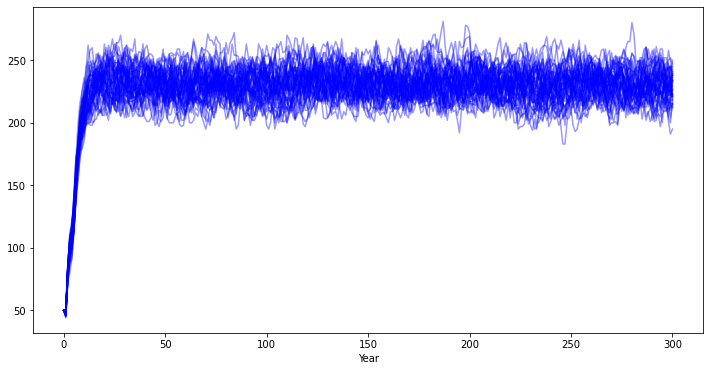

In [40]:
hd.Herbivores.plot(legend=False, alpha=0.4, color='b');

Compute some statistics for the late part of he simulation, after the initial transition. We set the limit somewhat arbitrarily at 100 years.

In [41]:
hd_eq = hd.loc[hd.index >= 100, :]

Look first at mean and standard deviation for each individual simulation.

In [42]:
hd_eq.mean()

            Seed
Herbivores  100     231.368159
            101     231.875622
            102     233.079602
            103     229.800995
            104     231.761194
            105     229.477612
            106     232.427861
            107     233.741294
            108     232.373134
            109     229.860697
            110     228.965174
            111     230.338308
            112     229.283582
            113     234.218905
            114     230.278607
            115     230.253731
            116     235.805970
            117     231.850746
            118     231.134328
            119     229.890547
            120     233.611940
            121     232.159204
            122     229.830846
            123     233.004975
            124     232.631841
            125     229.000000
            126     234.383085
            127     228.616915
            128     230.273632
            129     230.890547
            130     228.910448
            131     23

In [43]:
hd_eq.std()

            Seed
Herbivores  100     12.568762
            101     13.400726
            102     14.139082
            103     13.449171
            104     11.259338
            105     13.720086
            106     12.631549
            107     11.340315
            108     10.986586
            109     12.795331
            110     12.452461
            111     11.889280
            112     11.298857
            113     10.042004
            114     10.410187
            115     11.056686
            116     11.509004
            117     11.979049
            118     11.846808
            119     11.890667
            120     11.115694
            121     12.741449
            122     11.417147
            123     12.391730
            124     11.968867
            125     11.620241
            126     11.820216
            127     10.589500
            128     12.338953
            129     11.841789
            130     10.027559
            131     11.436321
            132     11.

Values are consistent across simulations.

Now combine data from all simulations and compute overall mean and std.

In [44]:
hd_eq.unstack().mean()

230.99770091963214

In [45]:
hd_eq.unstack().std()

12.128988457567514

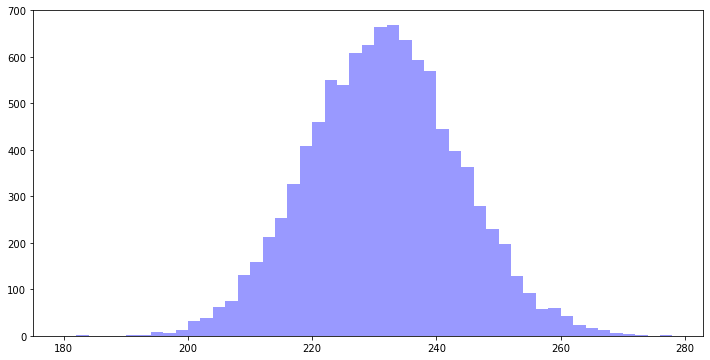

In [46]:
bins = np.arange(180, 280, 2)
plt.hist(hd_eq.Herbivores.unstack(), bins=bins, fc='b', histtype='stepfilled', alpha=0.4);

#### Summary for herbivores only

- 231.0 ± 12.1 herbivores
- Distribution looks reasonably normal
- When checking your simulation, if your animal count is around 230 in the long run, things are probably fine.

### Herbivores and Carnivores

In [47]:
data = []
for logfile in Path('../../../inf200-internal/biosim_jan_2022/examples/data').glob('mono_hc_00???.csv'):
    d = pd.read_csv(logfile, skiprows=1, index_col=0,
                    names=['Year', 'Herbivores', 'Carnivores'])
    d['Seed'] = int(re.match(r'.*_(\d+)\.csv', str(logfile)).group(1))
    data.append(d)
hc = pd.concat(data).pivot(columns='Seed')
hc.tail()

Herbivores                                             ... Carnivores  \
Seed        100  101  102  103 104  105  106  107  108 109  ...        190   
Year                                                        ...              
296          33  230  208  224  37  223  206  241  240  55  ...         19   
297          25  229  209  222  36  229  207  246  237  64  ...         13   
298          20  232  213  221  34  240  209  246  235  65  ...         14   
299          19  228  215  223  26  237  216  256  227  67  ...         12   
300          20  227  232  224  28  231  228  255  230  79  ...         11   

                                          
Seed 191 192 193 194 195 196 197 198 199  
Year                                      
296    0   0   0   0   0   0   0   0   0  
297    0   0   0   0   0   0   0   0   0  
298    0   0   0   0   0   0   0   0   0  
299    0   0   0   0   0   0   0   0   0  
300    0   0   0   0   0   0   0   0   0  

[5 rows x 200 columns]

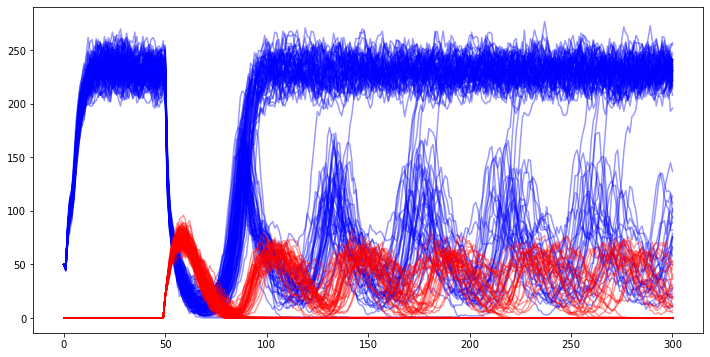

In [48]:
plt.plot(hc.Herbivores, 'b', alpha=0.4);
plt.plot(hc.Carnivores, 'r', alpha=0.4);

- We see three regimes
    - carnivores die out before year 100
    - herbivores and carnivores die out by year 100
    - herbivore and carnivore populations survive to year 300
- Check in how many cases animals die out

In [49]:
sum(hc.loc[300, 'Carnivores'] == 0)

77

In [50]:
sum(hc.loc[300, 'Herbivores'] == 0)

4

- Carnivores die out in about 3/4 of all cases. This is unfortunate for testing.
- We will look at modified parameters below.

#### Average population size if all survive

In [51]:
with_c = (hc.loc[300, 'Herbivores'] > 0) & (hc.loc[300, 'Carnivores'] > 0)
hc_eq = hc.loc[hc.index >= 175, np.hstack((with_c.values, with_c.values))]

In [52]:
hc_eq.Herbivores.unstack().mean(), hc_eq.Herbivores.unstack().std()

(60.81953071083506, 34.35131203877889)

In [53]:
hc_eq.Carnivores.unstack().mean(), hc_eq.Carnivores.unstack().std()

(38.612836438923395, 18.91367671531451)

- 60.8 ± 34.4 herbivores
- 38.6 ± 18.9 carnivores

in those cases where both herbivores and carnivores survive.

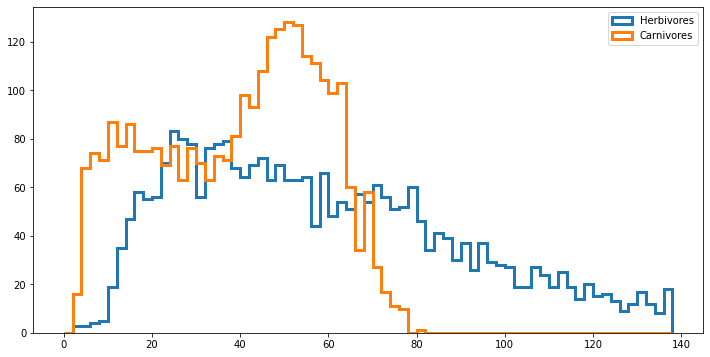

In [54]:
bins = np.arange(0, 140, 2)
plt.hist(hc_eq.Herbivores.unstack(), bins=bins, fc='b', histtype='step', alpha=1, lw=3, label='Herbivores');
plt.hist(hc_eq.Carnivores.unstack(), bins=bins, fc='r', histtype='step', alpha=1, lw=3, label='Carnivores');
plt.legend();

### Modified parameter values

- Below follow data for a simulation with $\Delta\Phi_{\text{max}}=15$ instead of the default value of $10$
- With this value, carnivores and herbivores survive in almost all cases.

In [55]:
data = []
for logfile in Path('../../../inf200-internal/biosim_jan_2022/examples/data').glob('mono_hc_15_00???.csv'):
    d = pd.read_csv(logfile, skiprows=1, index_col=0,
                    names=['Year', 'Herbivores', 'Carnivores'])
    d['Seed'] = int(re.match(r'.*_(\d+)\.csv', str(logfile)).group(1))
    data.append(d)
hc15 = pd.concat(data).pivot(columns='Seed')

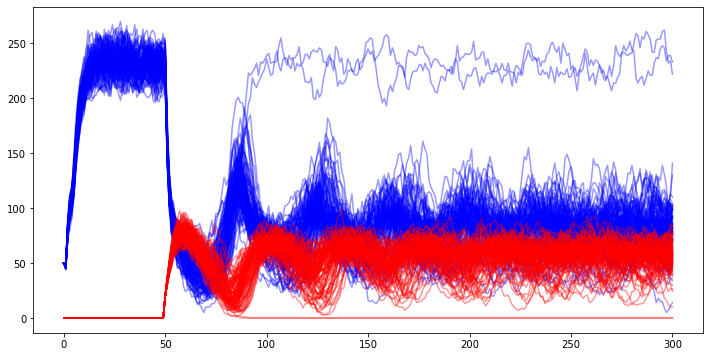

In [56]:
plt.plot(hc15.Herbivores, 'b', alpha=0.4);
plt.plot(hc15.Carnivores, 'r', alpha=0.4);

In [57]:
sum(hc15.loc[300, 'Carnivores'] == 0)

2

In [58]:
sum(hc15.loc[300, 'Herbivores'] == 0)

0

- Both species survive in almost all cases now.

#### Average population size if all survive

In [59]:
with_c15 = (hc15.loc[300, 'Herbivores'] > 0) & (hc15.loc[300, 'Carnivores'] > 0)
hc15_eq = hc15.loc[hc15.index >= 175, np.hstack((with_c15.values, with_c15.values))]

In [60]:
hc15_eq.Herbivores.unstack().mean(), hc15_eq.Herbivores.unstack().std()

(79.29778101716877, 18.90433230243139)

In [61]:
hc15_eq.Carnivores.unstack().mean(), hc15_eq.Carnivores.unstack().std()

(56.491172659540005, 12.68172364740459)

- 79.3 ± 18.9 herbivores
- 56.5 ± 12.7 carnivores

in those cases where both herbivores and carnivores survive.

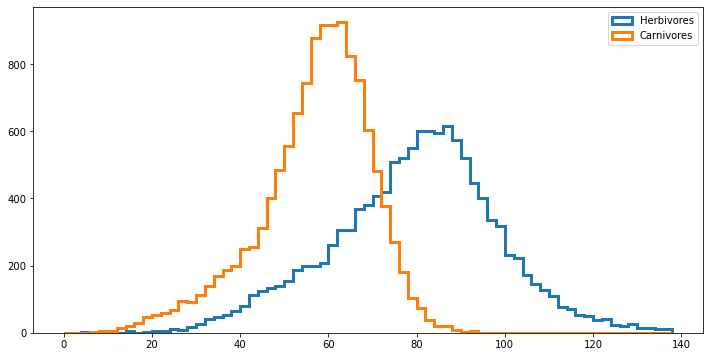

In [62]:
bins = np.arange(0, 140, 2)
plt.hist(hc15_eq.Herbivores.unstack(), bins=bins, fc='b', histtype='step', alpha=1, lw=3, label='Herbivores');
plt.hist(hc15_eq.Carnivores.unstack(), bins=bins, fc='r', histtype='step', alpha=1, lw=3, label='Carnivores');
plt.legend();